<a href="https://colab.research.google.com/github/Karansingh1221/Anomoly-Detection-using-Isolation-Forest/blob/main/ML_AnomalyProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import DBSCAN
from sklearn.neighbors import LocalOutlierFactor
from statsmodels.tsa.arima.model import ARIMA
from datetime import datetime
import pandas as pd
import plotly.express as px
from sklearn.ensemble import IsolationForest
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

mpl.rcParams['figure.figsize']=(10,8)
mpl.rcParams['axes.grid'] = False

In [2]:
df = pd.read_csv("nyc_taxi.csv")

In [3]:
df

,timestamp,value
0,2014-07-01 00:00:00,10844
1,2014-07-01 00:30:00,8127
2,2014-07-01 01:00:00,6210
3,2014-07-01 01:30:00,4656
4,2014-07-01 02:00:00,3820
...,...,...
10315,2015-01-31 21:30:00,24670
10316,2015-01-31 22:00:00,25721
10317,2015-01-31 22:30:00,27309
10318,2015-01-31 23:00:00,26591


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10320 entries, 0 to 10319
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   timestamp  10320 non-null  object
 1   value      10320 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 161.4+ KB


In [5]:
df['timestamp']=pd.to_datetime(df['timestamp'])

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10320 entries, 0 to 10319
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   timestamp  10320 non-null  datetime64[ns]
 1   value      10320 non-null  int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 161.4 KB


In [7]:
df.head()

,timestamp,value
0,2014-07-01 00:00:00,10844
1,2014-07-01 00:30:00,8127
2,2014-07-01 01:00:00,6210
3,2014-07-01 01:30:00,4656
4,2014-07-01 02:00:00,3820


In [8]:
df=df.set_index('timestamp').resample("H").mean().reset_index()

<ipython-input-8-6ffd71624c9a>:1: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df=df.set_index('timestamp').resample("H").mean().reset_index()


In [9]:
df

,timestamp,value
0,2014-07-01 00:00:00,9485.5
1,2014-07-01 01:00:00,5433.0
2,2014-07-01 02:00:00,3346.5
3,2014-07-01 03:00:00,2216.5
4,2014-07-01 04:00:00,2189.5
...,...,...
5155,2015-01-31 19:00:00,28288.5
5156,2015-01-31 20:00:00,24138.0
5157,2015-01-31 21:00:00,24194.5
5158,2015-01-31 22:00:00,26515.0


In [10]:
df['hour']=df.timestamp.dt.hour

In [11]:
df['weekday']=pd.Categorical(df.timestamp.dt.strftime('%A'), categories=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'], ordered=True)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5160 entries, 0 to 5159
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   timestamp  5160 non-null   datetime64[ns]
 1   value      5160 non-null   float64       
 2   hour       5160 non-null   int32         
 3   weekday    5160 non-null   category      
dtypes: category(1), datetime64[ns](1), float64(1), int32(1)
memory usage: 106.3 KB


In [13]:
df

,timestamp,value,hour,weekday
0,2014-07-01 00:00:00,9485.5,0,Tuesday
1,2014-07-01 01:00:00,5433.0,1,Tuesday
2,2014-07-01 02:00:00,3346.5,2,Tuesday
3,2014-07-01 03:00:00,2216.5,3,Tuesday
4,2014-07-01 04:00:00,2189.5,4,Tuesday
...,...,...,...,...
5155,2015-01-31 19:00:00,28288.5,19,Saturday
5156,2015-01-31 20:00:00,24138.0,20,Saturday
5157,2015-01-31 21:00:00,24194.5,21,Saturday
5158,2015-01-31 22:00:00,26515.0,22,Saturday


<ipython-input-14-8de76c4818bb>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df[['value','weekday']].groupby('weekday').mean().plot()


<Axes: xlabel='weekday'>

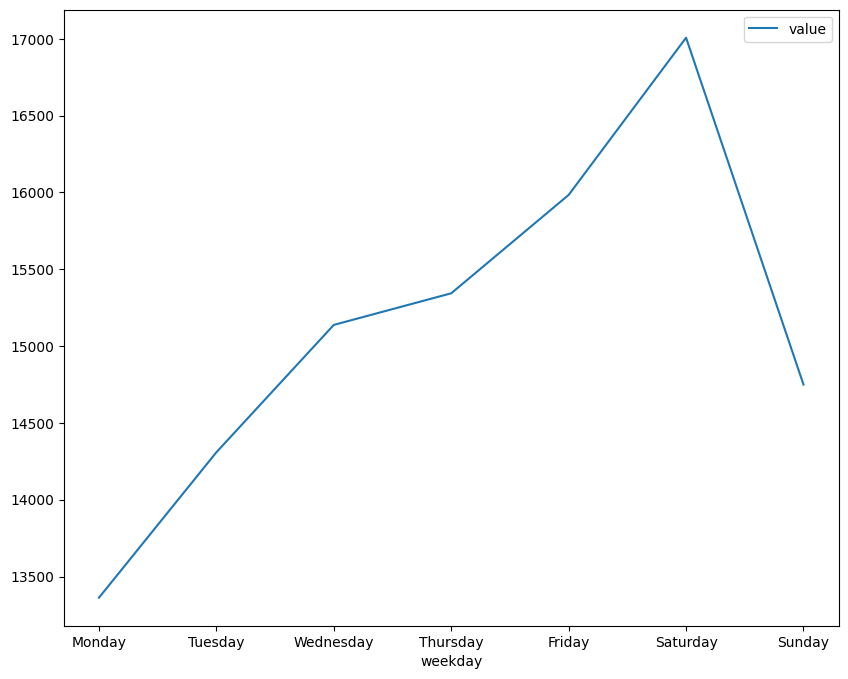

In [14]:
df[['value','weekday']].groupby('weekday').mean().plot()

<Axes: xlabel='hour'>

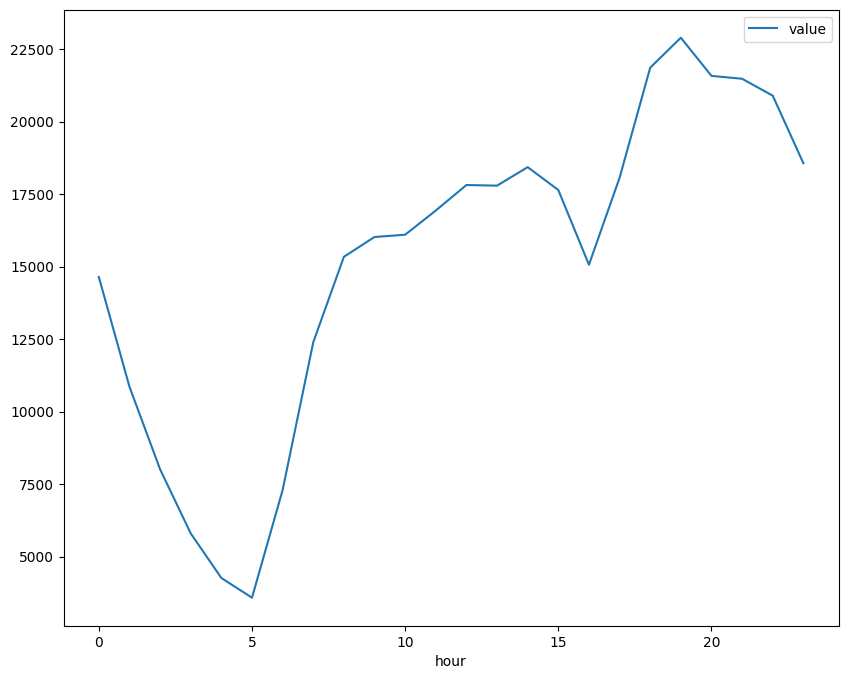

In [15]:
df[['value','hour']].groupby('hour').mean().plot()

In [16]:
fig = px.line(df, x='timestamp', y='value', title='NYC Taxi Demand with Global Outliers')

fig.update_xaxes(rangeslider_visible=True)
fig.show()

Anomalous Point

```
NYC Marathon - 2014-11-02
Thanksgiving - 2014-11-27
Christmas - 2014-12-25
New Years - 2015-01-01
Snow Blizzard - 2015-01-26 and 2015-01-27

```



In [17]:
model_global = IsolationForest(contamination=0.004)
model_global.fit(df[['value']])
df['global_outliers'] = pd.Series(model_global.predict(df[['value']])).apply(lambda x: 'yes' if x == -1 else 'no')

In [18]:
fig = px.scatter(df, x='timestamp', y='value', color='global_outliers', hover_data=['weekday'], title='NYC Taxi Demand with Global Outliers')
fig.update_xaxes(rangeslider_visible=True)
fig.show()

In [19]:
# Contextual and local outlier detection by hour of day and day of week
df['hourly_mean'] = df.groupby('hour')['value'].transform('mean')
df['hourly_std'] = df.groupby('hour')['value'].transform('std')
df['weekday_mean'] = df.groupby('weekday')['value'].transform('mean')
df['weekday_std'] = df.groupby('weekday')['value'].transform('std')

<ipython-input-19-4c50942987a9>:4: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.

<ipython-input-19-4c50942987a9>:5: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



In [20]:
# Define a threshold for local outliers
df['hourly_outlier'] = ((df['value'] < df['hourly_mean'] - 2 * df['hourly_std']) |
                        (df['value'] > df['hourly_mean'] + 2 * df['hourly_std']))
df['weekday_outlier'] = ((df['value'] < df['weekday_mean'] - 2 * df['weekday_std']) |
                         (df['value'] > df['weekday_mean'] + 2 * df['weekday_std']))

In [21]:
# Combine the outliers for contextual and local results
df['combined_outliers'] = df.apply(lambda row: 'yes' if (row['global_outliers'] == 'yes' or row['hourly_outlier'] or row['weekday_outlier']) else 'no', axis=1)

In [22]:
fig = px.scatter(df, x='timestamp', y='value', color='combined_outliers', hover_data=['hour', 'weekday'], title='NYC Taxi Demand with Global, Contextual, and Local Outliers')
fig.update_xaxes(rangeslider_visible=True)
fig.show()

In [23]:
model = IsolationForest(contamination=0.004)
model.fit(df[['value']])

IsolationForest(contamination=0.004)

In [24]:
score=model.decision_function(df[['value']])

In [25]:
score

array([0.17729724, 0.13242318, 0.17165972, ..., 0.18457299, 0.09009183,
       0.09667967])

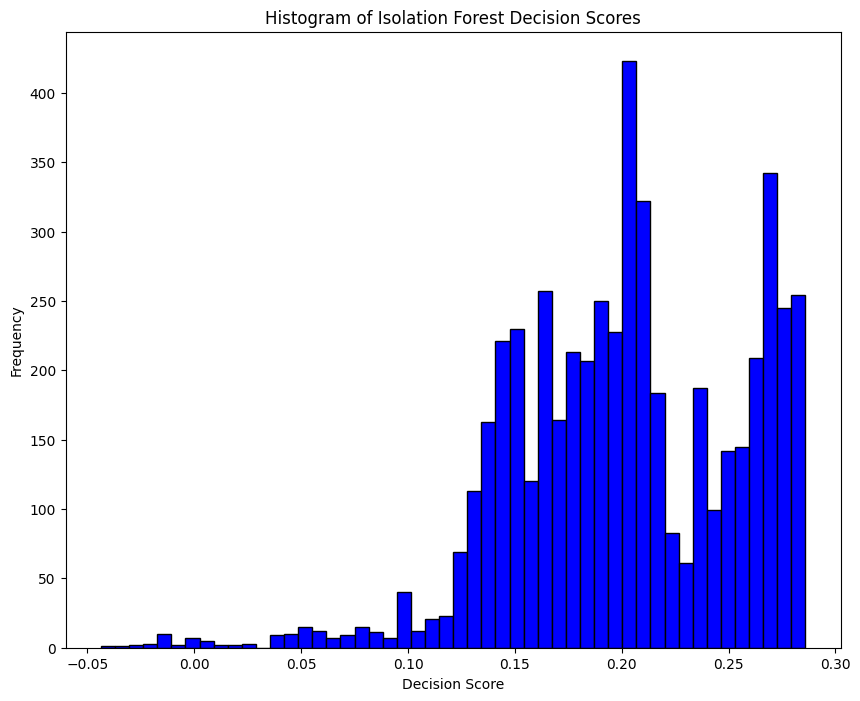

In [26]:
plt.hist(score, bins=50, color='blue', edgecolor='black')
plt.title('Histogram of Isolation Forest Decision Scores')
plt.xlabel('Decision Score')
plt.ylabel('Frequency')
plt.show()

In [27]:
y_true = df['global_outliers'].apply(lambda x: 1 if x == 'yes' else 0)
y_pred = df['combined_outliers'].apply(lambda x: 1 if x == 'yes' else 0)

precision = precision_score(y_true, y_pred)
recall = recall_score(y_true, y_pred)
f1 = f1_score(y_true, y_pred)
accuracy = accuracy_score(y_true, y_pred)

print("Outlier Detection Metrics:")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")
print(f"Accuracy: {accuracy:.2f}")

Outlier Detection Metrics:
Precision: 0.11
Recall: 1.00
F1-Score: 0.20
Accuracy: 0.97


DBSCAN

In [28]:
dbscan = DBSCAN(eps=0.5, min_samples=5)
df['dbscan_outliers'] = dbscan.fit_predict(df[['value']])

In [29]:
df['dbscan_outliers'] = df['dbscan_outliers'].apply(lambda x: 'yes' if x == -1 else 'no')

In [30]:
df['combined_outliers'] = df.apply(lambda row: 'yes' if (row['global_outliers'] == 'yes' or row['hourly_outlier'] or row['weekday_outlier'] or row['dbscan_outliers'] == 'yes') else 'no', axis=1)


In [31]:
fig = px.scatter(df, x='timestamp', y='value', color='combined_outliers', hover_data=['hour', 'weekday'], title='NYC Taxi Demand with Global, Contextual, Local, and DBSCAN Outliers')
fig.update_xaxes(rangeslider_visible=True)
fig.show()

In [32]:
fig = px.scatter(df, x='timestamp', y='value', color='dbscan_outliers', hover_data=['weekday'], title='NYC Taxi Demand with DBSCAN Outliers')
fig.update_xaxes(rangeslider_visible=True)
fig.show()

In [33]:
y_true = df['global_outliers'].apply(lambda x: 1 if x == 'yes' else 0)
y_pred = df['combined_outliers'].apply(lambda x: 1 if x == 'yes' else 0)

In [34]:
precision = precision_score(y_true, y_pred)
recall = recall_score(y_true, y_pred)
f1 = f1_score(y_true, y_pred)
accuracy = accuracy_score(y_true, y_pred)

In [35]:
print("Outlier Detection Metrics:")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")
print(f"Accuracy: {accuracy:.2f}")

Outlier Detection Metrics:
Precision: 0.00
Recall: 1.00
F1-Score: 0.01
Accuracy: 0.01


KNN

In [36]:
lof = LocalOutlierFactor(n_neighbors=20, contamination=0.006)
df['lof_outliers'] = lof.fit_predict(df[['value']])
df['lof_outliers'] = df['lof_outliers'].apply(lambda x: 'yes' if x == -1 else 'no')

In [37]:
df['combined_outliers'] = df.apply(lambda row: 'yes' if (row['global_outliers'] == 'yes' or
                                                         row['hourly_outlier'] or
                                                         row['weekday_outlier']  or
                                                         row['lof_outliers'] == 'yes')
                                   else 'no', axis=1)

In [38]:
fig = px.scatter(df, x='timestamp', y='value', color='combined_outliers', hover_data=['hour', 'weekday'],
                 title='NYC Taxi Demand with Global, Contextual, Local, DBSCAN, and LOF Outliers')
fig.update_xaxes(rangeslider_visible=True)
fig.show()

In [39]:
fig = px.scatter(df, x='timestamp', y='value', color='lof_outliers', hover_data=['weekday'],
                 title='NYC Taxi Demand with LOF Outliers')
fig.update_xaxes(rangeslider_visible=True)
fig.show()

In [40]:
y_true = df['global_outliers'].apply(lambda x: 1 if x == 'yes' else 0)
y_pred = df['combined_outliers'].apply(lambda x: 1 if x == 'yes' else 0)

In [41]:
precision = precision_score(y_true, y_pred)
recall = recall_score(y_true, y_pred)
f1 = f1_score(y_true, y_pred)
accuracy = accuracy_score(y_true, y_pred)

print("Outlier Detection Metrics:")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")
print(f"Accuracy: {accuracy:.2f}")

Outlier Detection Metrics:
Precision: 0.10
Recall: 1.00
F1-Score: 0.19
Accuracy: 0.97


ARIMA

In [42]:
model_arima = ARIMA(df['value'], order=(5, 1, 0))
model_arima_fit = model_arima.fit()

In [43]:
df['forecast'] = model_arima_fit.predict(start=0, end=len(df)-1, typ='levels')
df['residuals'] = df['value'] - df['forecast']

In [44]:
threshold = 2 * np.std(df['residuals'])
df['arima_outliers'] = np.where(abs(df['residuals']) > threshold, 'yes', 'no')

In [45]:
df['combined_outliers'] = df.apply(lambda row: 'yes' if (row['global_outliers'] == 'yes' or
                                                         row['hourly_outlier'] or
                                                         row['weekday_outlier'] or
                                                         row['arima_outliers'] == 'yes')
                                   else 'no', axis=1)

In [46]:
fig = px.scatter(df, x='timestamp', y='value', color='combined_outliers', hover_data=['hour', 'weekday'],
                 title='NYC Taxi Demand with Global, Contextual and ARIMA Outliers')
fig.update_xaxes(rangeslider_visible=True)
fig.show()

In [47]:
fig = px.scatter(df, x='timestamp', y='value', color='arima_outliers', hover_data=['weekday'],
                 title='NYC Taxi Demand with ARIMA Outliers')
fig.update_xaxes(rangeslider_visible=True)
fig.show()

In [48]:
y_true = df['global_outliers'].apply(lambda x: 1 if x == 'yes' else 0)
y_pred = df['combined_outliers'].apply(lambda x: 1 if x == 'yes' else 0)

precision = precision_score(y_true, y_pred)
recall = recall_score(y_true, y_pred)
f1 = f1_score(y_true, y_pred)
accuracy = accuracy_score(y_true, y_pred)

print("Outlier Detection Metrics:")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")
print(f"Accuracy: {accuracy:.2f}")

Outlier Detection Metrics:
Precision: 0.05
Recall: 1.00
F1-Score: 0.09
Accuracy: 0.92
